# Objective:- This is a usecase where we need to predict the 'Flight Ticket Price' we are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
#importing libraries for visiualizing and understanding dataset
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
ticket_df=pd.read_excel('Data_Train.xlsx')

# Finding insights of the data and what it consist of

In [3]:
ticket_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
ticket_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Attribute Information

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [5]:
#finding the numbers of rows and column
ticket_df.shape

(10683, 11)

In [6]:
#finding the number of rows and columns
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#finding the different airlines present in the dataset and their count
print(ticket_df['Airline'].unique())
print("\n")
print(ticket_df['Airline'].value_counts())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [8]:
#finding the different Source present in the dataset and their count
print(ticket_df['Source'].unique())
print("\n")
print(ticket_df['Source'].value_counts())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [9]:
#finding the different Destination present in the dataset and their count
print(ticket_df['Destination'].unique())
print("\n")
print(ticket_df['Destination'].value_counts())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [10]:
#finding the different Total_Stops in the dataset and their count
print(ticket_df['Total_Stops'].unique())
print("\n")
print(ticket_df['Total_Stops'].value_counts())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [11]:
#finding the different Route in the dataset and their count
print(ticket_df['Route'].unique())
print("\n")


['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR' 'DEL → NAG → BOM → COK' 'CCU → MAA → BLR'
 'DEL → HYD → COK' 'CCU → HYD → BLR' 'DEL → COK' 'CCU → DEL → BLR'
 'BLR → BOM → AMD → DEL' 'BOM → DEL → HYD' 'DEL → MAA → COK' 'BOM → HYD'
 'DEL → BHO → BOM → COK' 'DEL → JAI → BOM → COK' 'DEL → ATQ → BOM → COK'
 'DEL → JDH → BOM → COK' 'CCU → BBI → BOM → BLR' 'BLR → MAA → DEL'
 'DEL → GOI → BOM → COK' 'DEL → BDQ → BOM → COK' 'CCU → JAI → BOM → BLR'
 'CCU → BBI → BLR' 'BLR → HYD → DEL' 'DEL → TRV → COK'
 'CCU → IXR → DEL → BLR' 'DEL → IXU → BOM → COK' 'CCU → IXB → BLR'
 'BLR → BOM → JDH → DEL' 'DEL → UDR → BOM → COK' 'DEL → HYD → MAA → COK'
 'CCU → BOM → COK → BLR' 'BLR → CCU → DEL' 'CCU → BOM → GOI → 

In [12]:
print(ticket_df['Route'].value_counts())

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → CCU → HYD                   1
BOM → VNS → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
BLR → HBX → BOM → BHO → DEL       1
BOM → COK → MAA → HYD             1
Name: Route, Length: 128, dtype: int64


In [13]:
#finding diffrent Additional information and their count
print(ticket_df['Additional_Info'].unique())
print(ticket_df['Additional_Info'].value_counts())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64


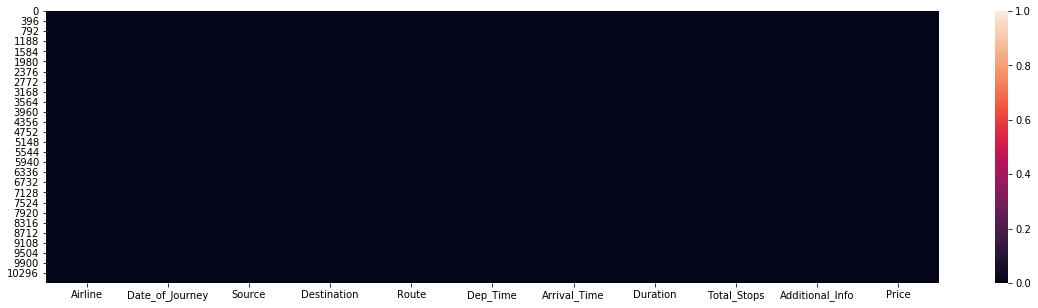

In [14]:
#checking null values
plt.figure(figsize=(20,5))
sns.heatmap(ticket_df.isnull())

In [15]:
ticket_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
#replacing the null values in route with the mode of the column
r_mode=ticket_df['Route'].mode()
print(r_mode)
ticket_df['Route']=ticket_df['Route'].fillna(r_mode[0])

0    DEL → BOM → COK
dtype: object


In [17]:
#replacing the null values in Total_Stops with the mode of the column
tt_mode=ticket_df['Total_Stops'].mode()
print(tt_mode)
ticket_df['Total_Stops']=ticket_df['Total_Stops'].fillna(tt_mode[0])

0    1 stop
dtype: object


In [18]:
#changing hours into minutes
ticket_df['Duration']=ticket_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [29]:
#from information we can observe that Date Of Journey is an object data type therefore extracting day and month of journey simultaneously
ticket_df["Journey_day"] = pd.to_datetime(ticket_df.Date_of_Journey, format="%d/%m/%Y").dt.day
ticket_df["Journey_Month"] = pd.to_datetime(ticket_df.Date_of_Journey, format="%d/%m/%Y").dt.month

In [30]:
#likewise we can extract Departure hour and arrival hour as well as  Departure minute and arrival minute
ticket_df["Dep_hour"] = pd.to_datetime(ticket_df["Dep_Time"]).dt.hour
ticket_df["Dep_min"] = pd.to_datetime(ticket_df["Dep_Time"]).dt.minute
ticket_df["Arrival_hour"] = pd.to_datetime(ticket_df["Arrival_Time"]).dt.minute
ticket_df["Arrival_min"] = pd.to_datetime(ticket_df["Arrival_Time"]).dt.minute

In [31]:
ticket_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,22,20,10,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,1,5,5,50,15,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,9,25,25,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218,12,5,18,5,30,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302,1,3,16,50,35,35


In [32]:
#dropping 'Date_of_Journey' 'Dep_Time' 'Arrival_Time' as we have extracted features from these columns
ticket_df.drop(['Date_of_Journey','Dep_Time', 'Arrival_Time'],axis=1,inplace=True)

In [33]:
ticket_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,10,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,15,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,30,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,35,35


In [20]:
ticket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  int64 
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 918.2+ KB


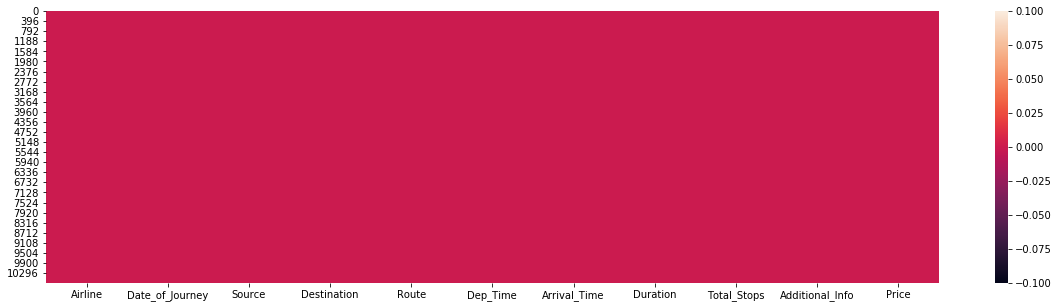

In [21]:
#rechecking null values
plt.figure(figsize=(20,5))
sns.heatmap(ticket_df.isnull())

In [22]:
ticket_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Bivariate Analysis

Text(0.5, 1.0, 'Count of flight W.R.T Airline Company')

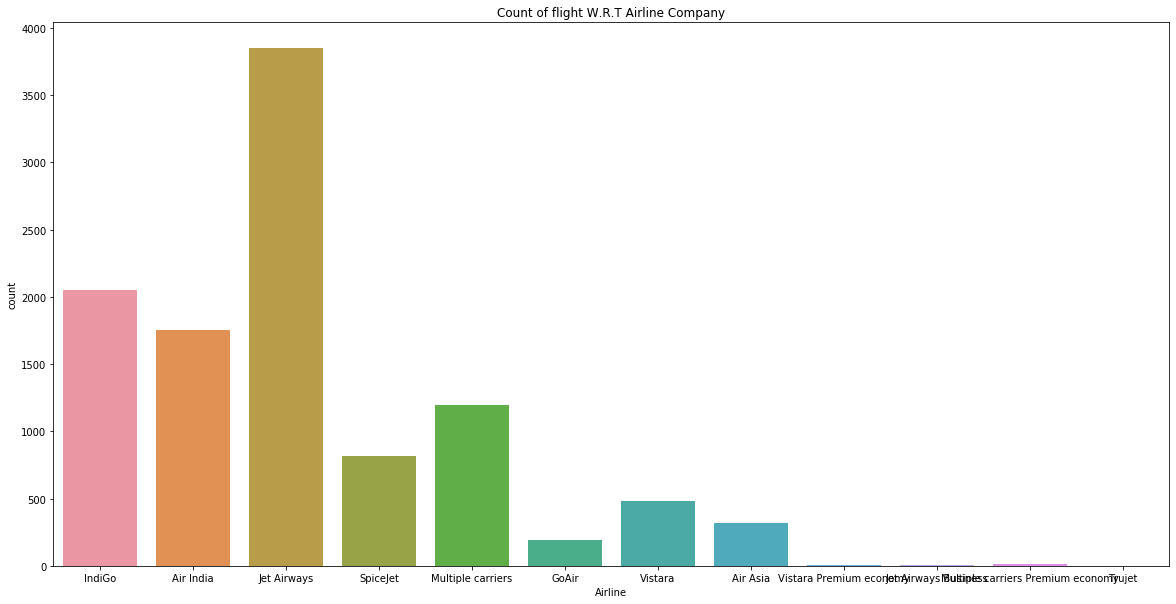

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(ticket_df['Airline'])
plt.title('Count of flight W.R.T Airline Company')

Text(0.5, 1.0, 'Price W.R.T Airline Company')

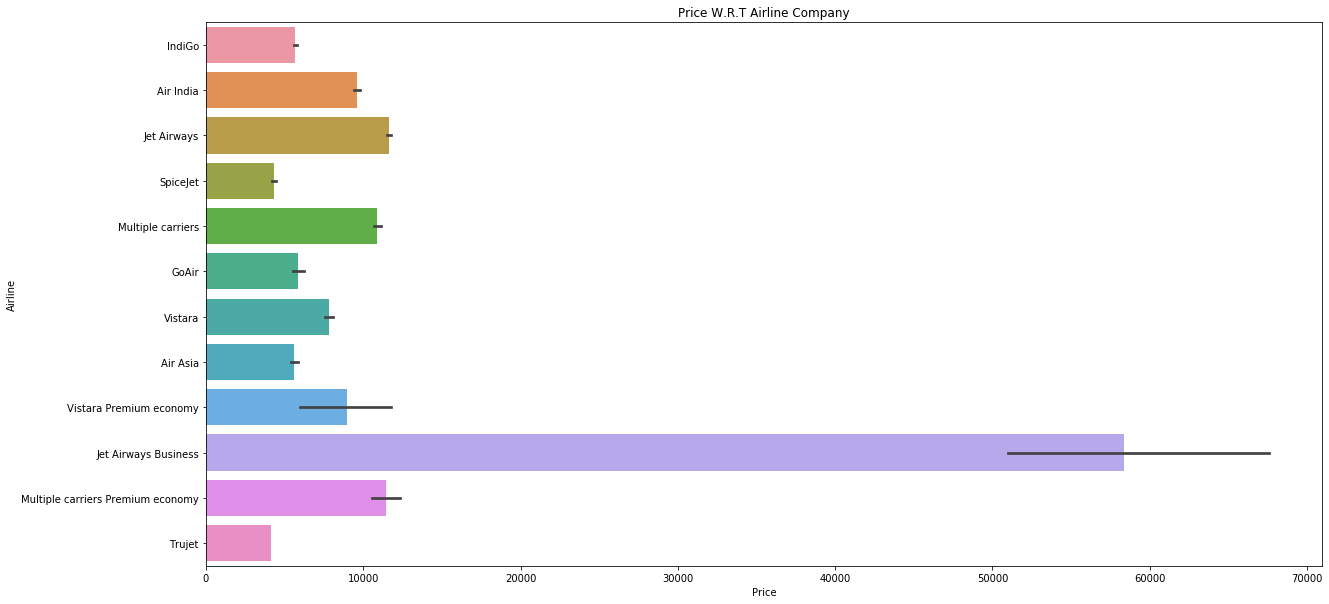

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(ticket_df['Price'],ticket_df['Airline'])
plt.title('Price W.R.T Airline Company')

Text(0.5, 1.0, 'Price W.R.T Route')

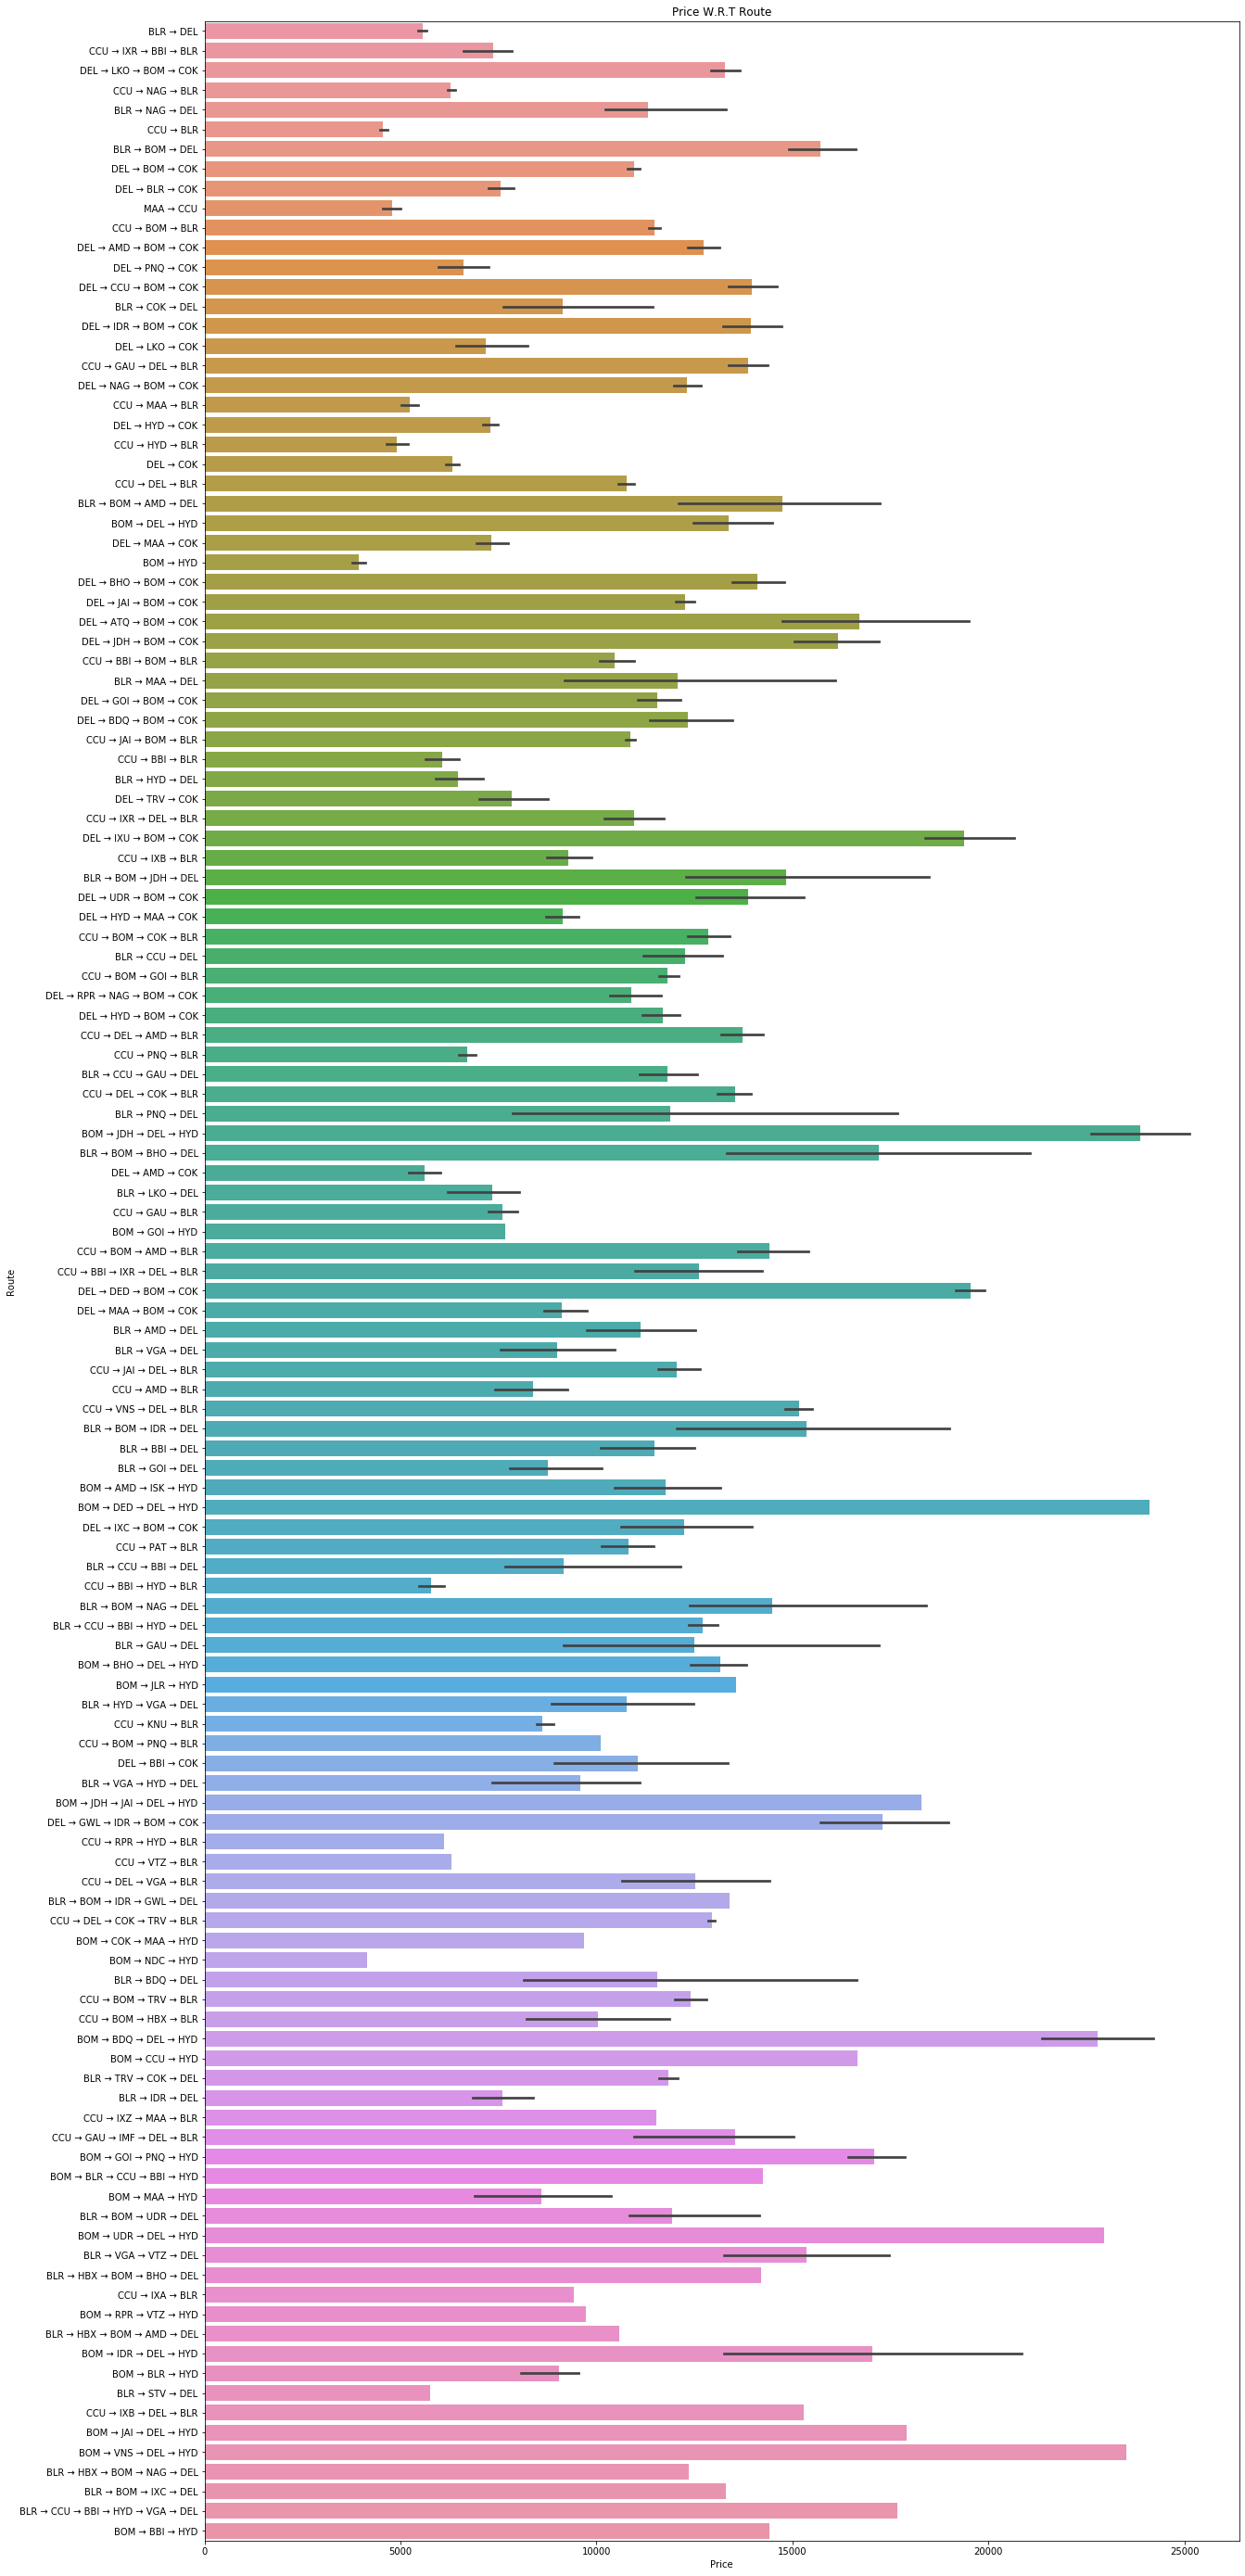

In [24]:
plt.figure(figsize=(20,50))
sns.barplot(ticket_df['Price'],ticket_df['Route'])
plt.title('Price W.R.T Route')

Text(0.5, 1.0, 'Price W.R.T Total Stops')

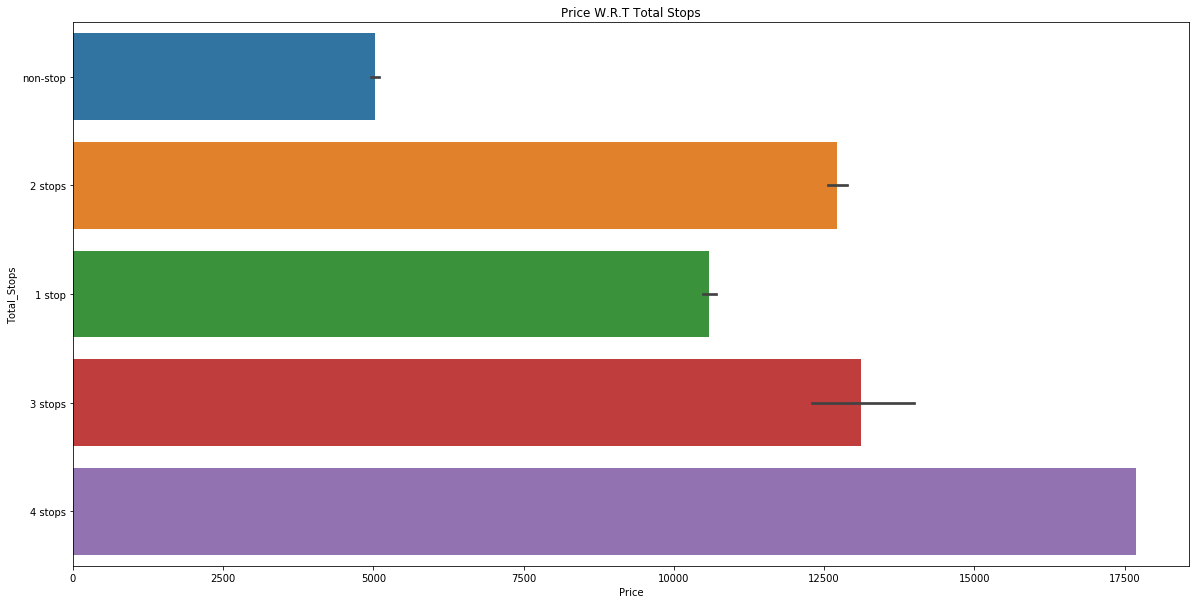

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(ticket_df['Price'],ticket_df['Total_Stops'])
plt.title('Price W.R.T Total Stops')

Text(0.5, 1.0, 'Price W.R.T Time taken by the flight')

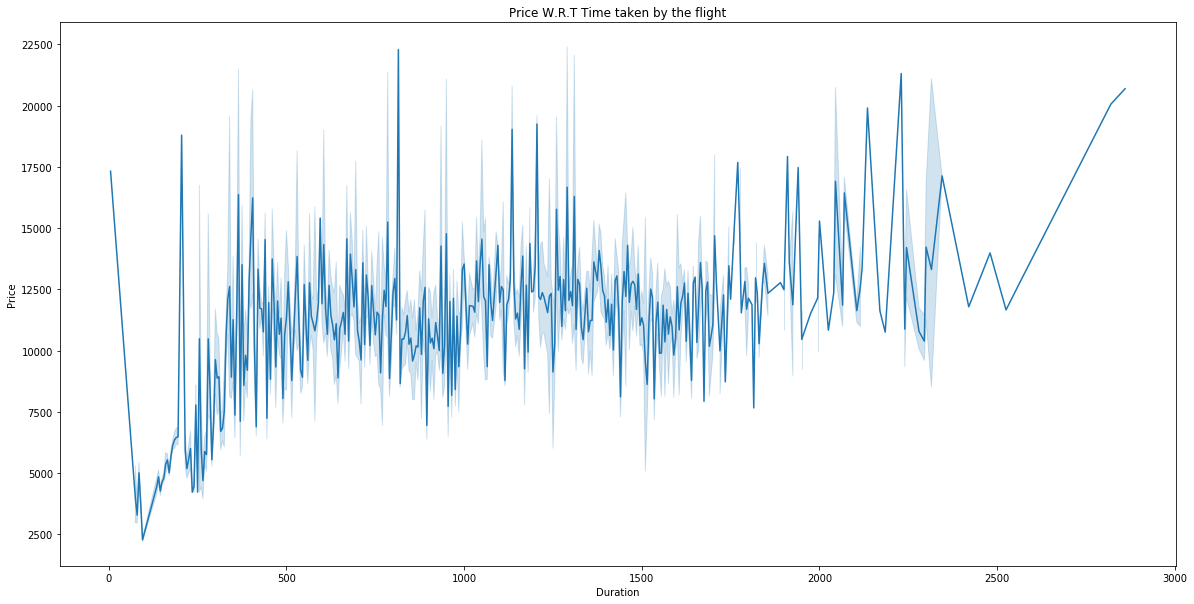

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(ticket_df['Duration'],ticket_df['Price'])
plt.title('Price W.R.T Time taken by the flight')

Text(0.5, 1.0, 'Price W.R.T Additional_Info')

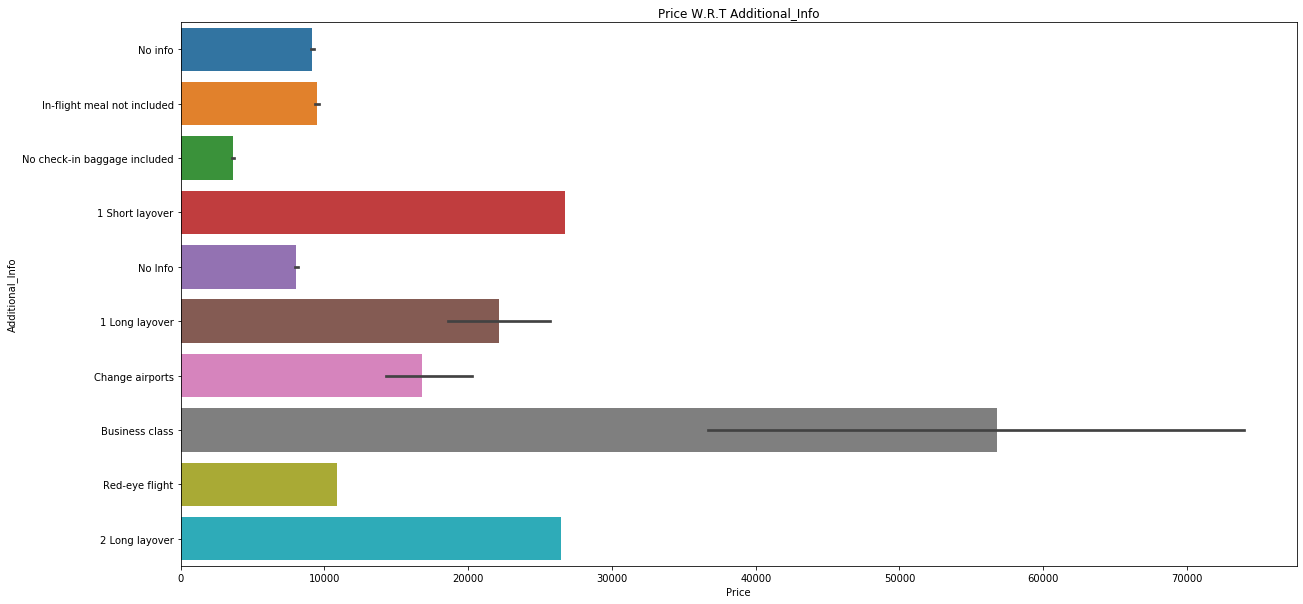

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(ticket_df['Price'],ticket_df['Additional_Info'])
plt.title('Price W.R.T Additional_Info')

Text(0.5, 1.0, 'Count of flight W.R.T Month')

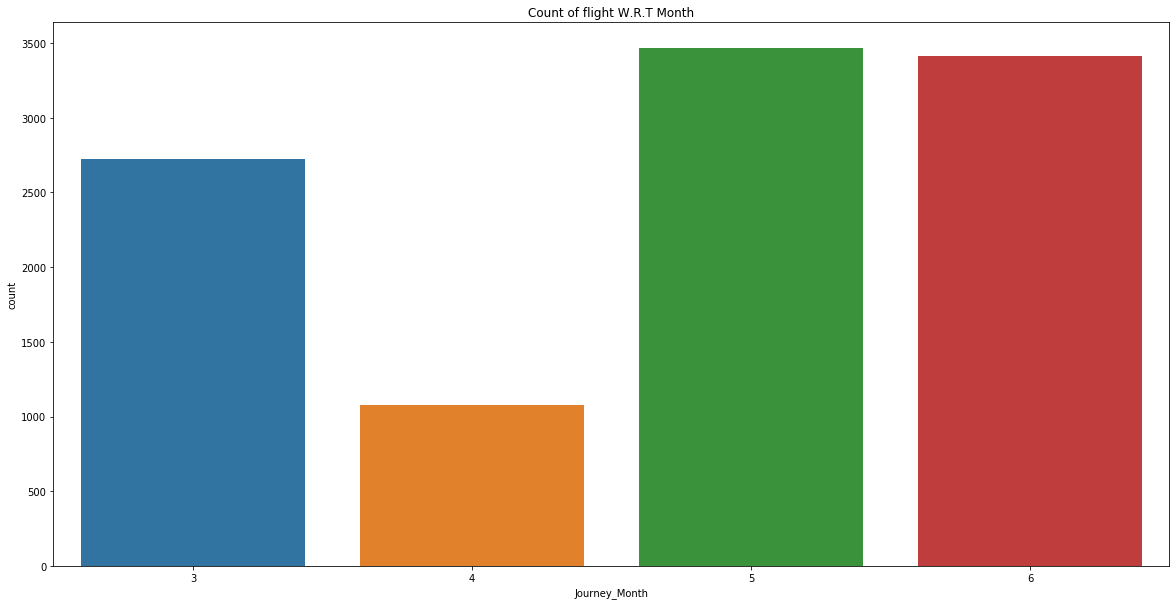

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(ticket_df['Journey_Month'])
plt.title('Count of flight W.R.T Month')

# Changing the categorical column 'values' to numeric 'values' using 'LABEL ENCODER'

In [35]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [36]:
ticket_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [38]:
columns=(lb.fit_transform(ticket_df['Airline']),lb.fit_transform(ticket_df['Source']),lb.fit_transform(ticket_df['Destination']),lb.fit_transform(ticket_df['Route']),lb.fit_transform(ticket_df['Total_Stops']),lb.fit_transform(ticket_df['Additional_Info']))

In [39]:
ticket_df['Airline']=columns[0]
ticket_df['Source']=columns[1]
ticket_df['Destination']=columns[2]
ticket_df['Route']=columns[3]
ticket_df['Total_Stops']=columns[4]
ticket_df['Additional_Info']=columns[5]

In [40]:
ticket_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,170,4,8,3897,24,3,22,20,10,10
1,1,3,0,84,445,1,8,7662,1,5,5,50,15,15
2,4,2,1,118,1140,1,8,13882,9,6,9,25,25,25
3,3,3,0,91,325,0,8,6218,12,5,18,5,30,30
4,3,0,5,29,285,0,8,13302,1,3,16,50,35,35


In [41]:
#now every categorical column has been converted into numeric column

# Univariate Analysis

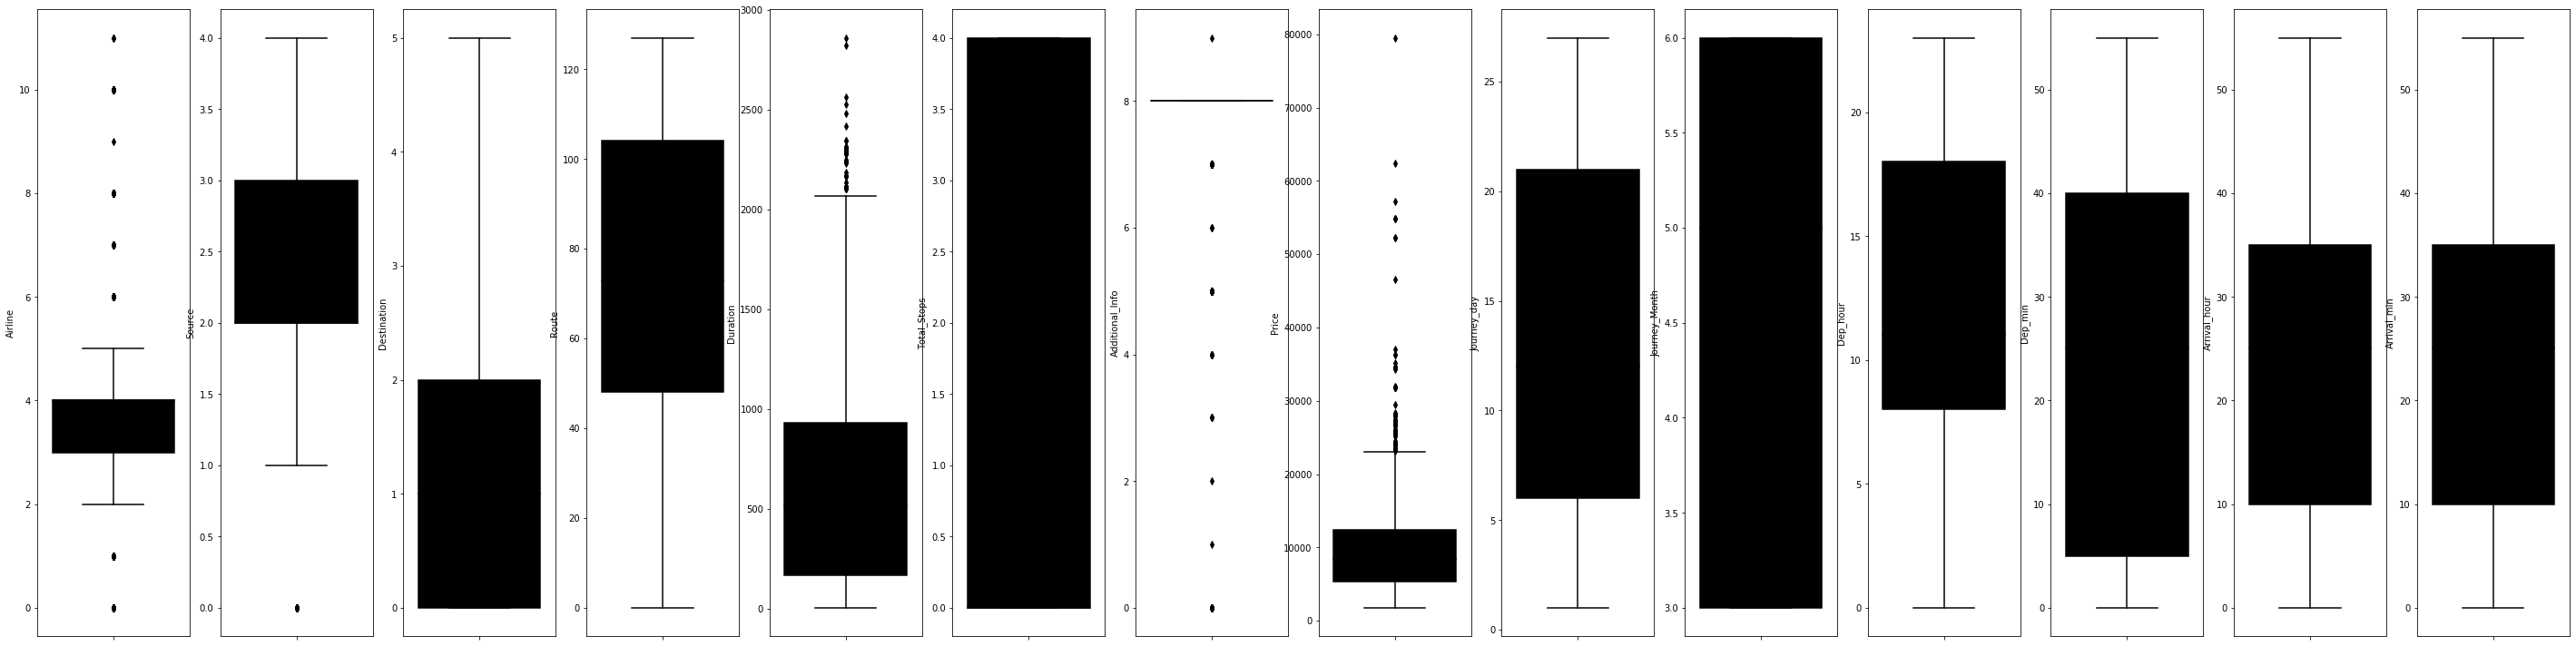

In [42]:
#using boxplot to see outliers and IQR range
collist=ticket_df.columns.values
ncol=14
nrows=10
plt.figure(figsize=(50,150))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ticket_df[collist[i]],color='black',orient='v')

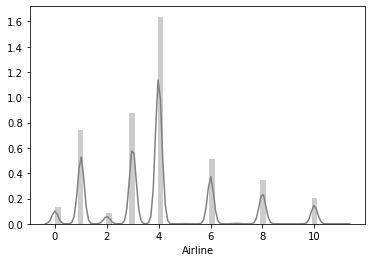

In [46]:
#checking the distribution
sns.distplot(ticket_df['Airline'],color='grey')

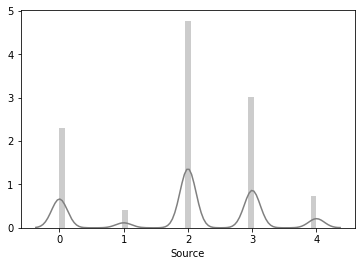

In [47]:
#checking the distribution
sns.distplot(ticket_df['Source'],color='grey')

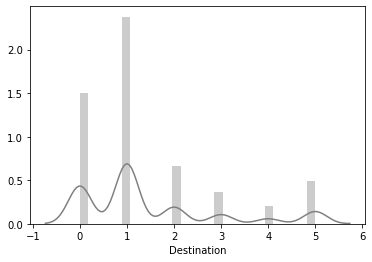

In [48]:
#checking the distribution
sns.distplot(ticket_df['Destination'],color='grey')

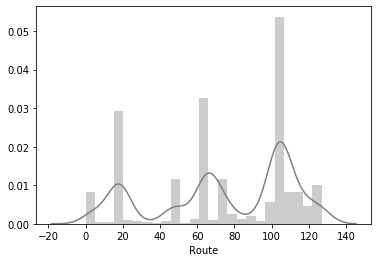

In [49]:
#checking the distribution
sns.distplot(ticket_df['Route'],color='grey')

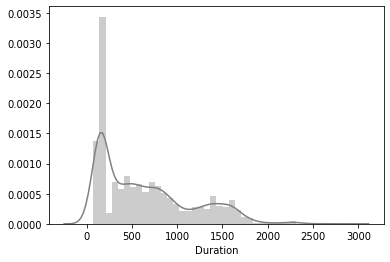

In [50]:
#checking the distribution
sns.distplot(ticket_df['Duration'],color='grey')

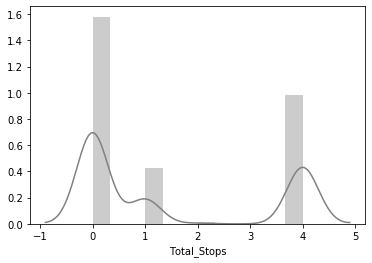

In [51]:
#checking the distribution
sns.distplot(ticket_df['Total_Stops'],color='grey')

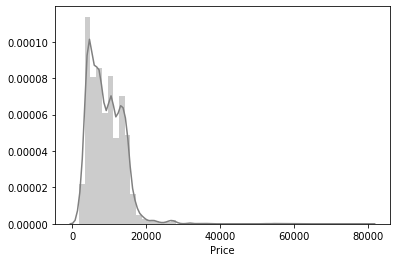

In [52]:
#checking the distribution
sns.distplot(ticket_df['Price'],color='grey')

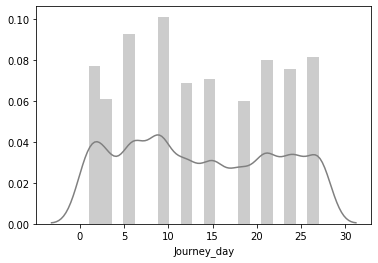

In [53]:
#checking the distribution
sns.distplot(ticket_df['Journey_day'],color='grey')

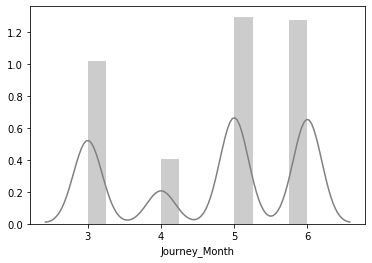

In [55]:
#checking the distribution
sns.distplot(ticket_df['Journey_Month'],color='grey')

# Statistical Analysis

In [56]:
ticket_df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,643.093232,1.458111,7.393054,9087.064121,13.508378,4.708602,12.490686,24.411214,24.690630,24.690630
std,2.352155,1.177221,1.474782,36.728405,507.862001,1.806290,1.214211,4611.359167,8.479277,1.164357,5.748650,18.767980,16.506036,16.506036
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,170.000000,0.000000,8.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,10.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,520.000000,0.000000,8.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,25.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,930.000000,4.000000,8.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,35.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,2860.000000,4.000000,9.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,55.000000,55.000000


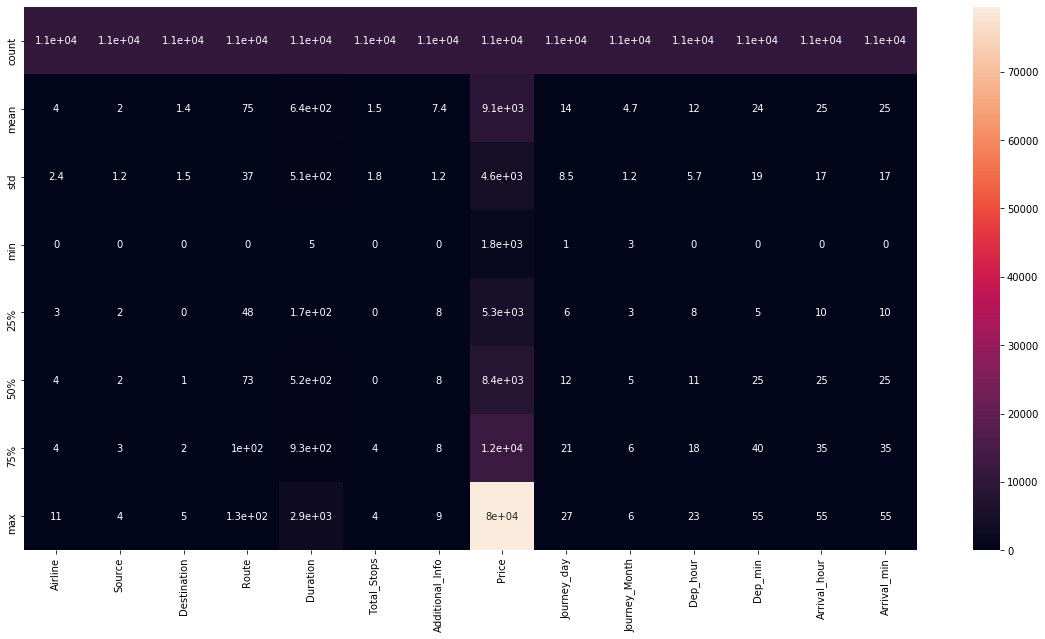

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(ticket_df.describe(),annot=True)

In [58]:
ticket_cor=ticket_df.corr()

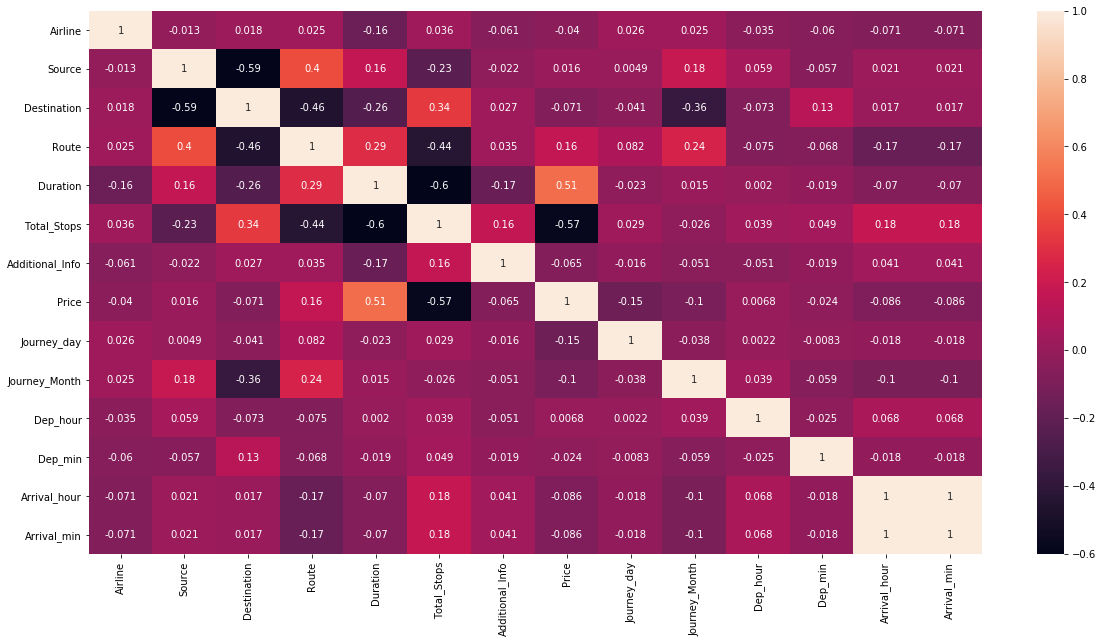

In [59]:
plt.figure(figsize=(20,10))
sns.heatmap(ticket_cor,annot=True)

In [60]:
#cheking the skewness
ticket_df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Duration           0.861074
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
Journey_day        0.118351
Journey_Month     -0.387493
Dep_hour           0.113073
Dep_min            0.167029
Arrival_hour       0.110945
Arrival_min        0.110945
dtype: float64

In [61]:
#the dataset is positively skewed as well as negatively skewed

# Removing outliers and skewness from the dataset

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(ticket_df))
print(z)

[[0.41067545 1.65844074 2.41666505 ... 0.23505036 0.8900573  0.8900573 ]
 [1.26099927 0.89005213 0.97382594 ... 1.36349161 0.58712363 0.58712363]
 [0.01448647 0.04055451 0.29572775 ... 0.0313733  0.01874372 0.01874372]
 ...
 [0.01448647 1.65844074 0.38237045 ... 0.23505036 0.28418995 0.28418995]
 [2.56545795 1.65844074 2.41666505 ... 0.29779696 0.8900573  0.8900573 ]
 [1.26099927 0.04055451 0.29572775 ... 1.62991527 0.58712363 0.58712363]]


In [63]:
threhold=3

In [64]:
print(np.where(z>3))#printing all the value position which are greater than the threshold value

(array([  123,   226,   396,   486,   510,   553,   597,   628,   657,
         785,   785,   826,   936,   946,   959,   966,   969,   975,
        1043,  1067,  1113,  1196,  1246,  1341,  1346,  1424,  1442,
        1466,  1478,  1496,  1551,  1629,  1654,  1657,  1785,  1791,
        1804,  1918,  2055,  2079,  2099,  2108,  2172,  2405,  2481,
        2495,  2495,  2553,  2556,  2556,  2618,  2635,  2641,  2654,
        2693,  2718,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3457,  3535,  3700,  3700,  3788,  3790,  3815,  3966,
        4012,  4047,  4118,  4463,  4521,  4521,  4655,  4676,  4829,
        5013,  5013,  5136,  5372,  5372,  5439,  5516,  5628,  5662,
        5701,  5701,  5710,  5711,  5719,  5738,  5745,  5782,  5856,
        5933,  5953,  5986,  6024,  6059,  6085,  6314,  6321,  6336,
        6407,  6476,  6576,  6576,  6588,  6605,  6884,  6991,  7189,
        7232,  7306,  7329,  7351,  7356,  7377,  7537,  7553,  7554,
        7611,  7612

In [66]:
z[123][7]#checking the above output result

3.9779582952974644

In [67]:
z[226][4]#checking the above output result

3.1543642659205124

In [68]:
ticket_new=ticket_df[(z<3).all(axis=1)]  #removing outliers

In [69]:
print("Shape of the dataset before removing outliers",ticket_df.shape)
print("\n \n")
print("Shape of the dataset after removing the outliers",ticket_new.shape)

Shape of the dataset before removing outliers (10683, 14)

 

Shape of the dataset after removing the outliers (10513, 14)


In [70]:
#we are left with 10513 rows after removing the outliers

In [71]:
#checking skewness after removing outliers
ticket_new.skew()

Airline            0.729378
Source            -0.438310
Destination        1.264156
Route             -0.505804
Duration           0.778466
Total_Stops        0.614009
Additional_Info   -1.529239
Price              0.413054
Journey_day        0.108571
Journey_Month     -0.417603
Dep_hour           0.104036
Dep_min            0.171190
Arrival_hour       0.107821
Arrival_min        0.107821
dtype: float64

In [72]:
#removing the Skewness
for i in range(0,len(collist)):
    if ticket_new.skew().loc[collist[i]]>0.55:
        ticket_new[collist[i]]=np.sqrt(ticket_new[collist[i]])

In [73]:
ticket_new.skew()

Airline           -0.481462
Source            -0.438310
Destination        0.020791
Route             -0.505804
Duration           0.314203
Total_Stops        0.390114
Additional_Info   -1.529239
Price              0.413054
Journey_day        0.108571
Journey_Month     -0.417603
Dep_hour           0.104036
Dep_min            0.171190
Arrival_hour       0.107821
Arrival_min        0.107821
dtype: float64

In [74]:
#hence the skewness is removed

# Splitting the data into training and testing sets

In [75]:
y=ticket_new['Price']

In [78]:
#dropping Price column from the dataset
ticket_new.drop(['Price'],axis=1,inplace=True)

In [79]:
x=ticket_new.iloc[:,:]

In [80]:
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,1.732051,0,2.236068,18,13.038405,2.0,8,24,3,22,20,10,10
1,1.000000,3,0.000000,84,21.095023,1.0,8,1,5,5,50,15,15
2,2.000000,2,1.000000,118,33.763886,1.0,8,9,6,9,25,25,25
3,1.732051,3,0.000000,91,18.027756,0.0,8,12,5,18,5,30,30
4,1.732051,0,2.236068,29,16.881943,0.0,8,1,3,16,50,35,35


In [81]:
x.shape

(10513, 13)

In [82]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [83]:
y.shape

(10513,)

As the dataset is already scaled skkiping the scaling of the data

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.neighbors import KNeighborsRegressor 

In [85]:
#Finding the best Random state

max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lm=LinearRegression() 
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    pred=lm.predict(x_test)
    r_score=r2_score(y_test,pred)
    print("R2 SCORE is equal to :",r_score,"at random state",i)
    
    if r_score > max_score:
        max_score=r_score
        final_rstate=i
print("The maximum r2_score is ",max_score, "at random state",final_rstate) 

R2 SCORE is equal to : 0.4718672476248207 at random state 42
R2 SCORE is equal to : 0.4744727658684026 at random state 43
R2 SCORE is equal to : 0.46114794553212657 at random state 44
R2 SCORE is equal to : 0.4564320802517656 at random state 45
R2 SCORE is equal to : 0.4674382652006729 at random state 46
R2 SCORE is equal to : 0.4592179883677031 at random state 47
R2 SCORE is equal to : 0.47800738244331453 at random state 48
R2 SCORE is equal to : 0.4737375838649893 at random state 49
R2 SCORE is equal to : 0.4902251117937525 at random state 50
R2 SCORE is equal to : 0.47361917837716183 at random state 51
R2 SCORE is equal to : 0.47089911995763156 at random state 52
R2 SCORE is equal to : 0.4712428175916781 at random state 53
R2 SCORE is equal to : 0.4758343984065022 at random state 54
R2 SCORE is equal to : 0.4738939556988748 at random state 55
R2 SCORE is equal to : 0.46768814813852444 at random state 56
R2 SCORE is equal to : 0.47209391087780384 at random state 57
R2 SCORE is equal 

In [86]:
#finalizing the train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=83)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7884, 13) (2629, 13) (7884,) (2629,)


In [97]:
#using Lasso, Ridge And Elastic net to overcome overfit and underfit situation

In [99]:
from sklearn.linear_model import Lasso,Ridge

In [100]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print("\n")
preed=ls.predict(x_test)
r_score=r2_score(y_test,preed)
print("The R2 score is",r_score)

0.46913604072024084


The R2 score is 0.48578180242533653


In [101]:
ri=Ridge(alpha=0.001)
ri.fit(x_train,y_train)
print(ri.score(x_train,y_train))
print("\n")
predd=ri.predict(x_test)
r_score=r2_score(y_test,predd)
print("The r2_score is",r_score)

0.4691360407202429


The r2_score is 0.4857818036340753


In [102]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
r_score=r2_score(y_test,enrpred)
print("The r2_score is",r_score)
enr.coef_

0.4573523653515952
The r2_score is 0.47371618646487057


array([ 205.99044277,  -90.29629975,   60.10086082,    4.34859802,
        232.91957818, -521.44130855,  207.87863364,  -50.04496183,
       -229.13641701,   14.22931358,   -6.85060843,   -3.52983976,
         -1.51120196])

In [103]:
from sklearn.model_selection import GridSearchCV
dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae')}
gd=GridSearchCV(dtr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'friedman_mse'}

In [104]:
from sklearn.model_selection import GridSearchCV
knr=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(knr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [105]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
parameters={'kernel':('linear','poly','rbf')}
gd=GridSearchCV(svr,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'linear'}

In [106]:
Model= []
score= []
cvs=[]
rocscore=[]
model=[LinearRegression(),SVR(kernel='linear'),DecisionTreeRegressor(criterion='friedman_mse'),KNeighborsRegressor(n_neighbors=10)]
for models in model:
    print("\n")
    Model.append(models)
    models.fit(x_train,y_train)
    print(models)
    prediction=models.predict(x_test)
    print("\n")
    R2_score=r2_score(y_test,prediction)
    print("R2_SCORE =",R2_score)
    score.append(R2_score*100)
    print("\n")
    
    

    



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2_SCORE = 0.48578180357117484




SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


R2_SCORE = 0.44016607628331383




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


R2_SCORE = 0.8661143456379519




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')


R2_SCORE = 0.6649189978766474




In [96]:
#Decision Tree Regresor is giving Good result hence finalizing it

In [108]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=dtr, n_estimators=500)
ada.fit(x_train,y_train)
print(ada.score(x_train,y_train))
pred=ada.predict(x_test)
print("Predicted result",pred)
print("\n \n")
print("Actual Price \n",y_test)

0.9392426486371552
Predicted result [ 6103.  3597.  7064. ...  8266. 10262. 13774.]

 

Actual Price 
 2418      5170
4092      2017
10443     6017
2702      9920
5643      4591
         ...  
7956      3543
3696      4804
10122     7952
8597     10844
4670     14871
Name: Price, Length: 2629, dtype: int64


In [109]:
r_score=r2_score(y_test,pred)
print("The r2_Score after apllying Boosting Technique for Linear _Regression is", r_score)

The r2_Score after apllying Boosting Technique for Linear _Regression is 0.8920057264690393


In [110]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr=GradientBoostingRegressor(n_estimators=500,max_depth= 4 ,min_samples_split= 5,learning_rate=0.1,loss='ls')
gbr.fit(x_train,y_train)
print(gbr.score(x_train,y_train))
gbrpred=gbr.predict(x_test)
R2_score=r2_score(gbrpred,y_test)
print("R2 Score =", R2_score)

0.9514811875952003
R2 Score = 0.9116296786997056


In [111]:
print("ERROR")


print("MEan Absolute error:",mean_absolute_error(y_test,gbrpred))
print("Mean squared error:",mean_absolute_error(y_test,gbrpred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,gbrpred)))

ERROR
MEan Absolute error: 753.8997833093732
Mean squared error: 753.8997833093732
Root mean squared error: 1124.3899034909055


In [112]:
#As GradientBoostingRegressor is giving good result hence saving it 

In [113]:
from sklearn.externals import joblib
joblib.dump(gbr,"gbr_Flight_tkt_Price.pkl")

['gbr_Flight_tkt_Price.pkl']